# Project NYC Dataset 311

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service.

# Objective

- Get major insights/patterns in a visual format (graphs or tables).
- Perform some statistical operation
    1.Whether the average response time across complaint types is similar or not (overall)
    2.Are the type of complaint or service requested and location related?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing NYC Dataset
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", index_col='Unique Key')

C:\Users\Rohit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Converting dataset to dataframe
df = pd.DataFrame(df)

In [4]:
#View of top 5 rows of dataset
df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
# Columns Present in Dataset
df.columns


Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
  

In [6]:
# numbers of rows and column present in dataset
df.shape

(300698, 52)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300698 entries, 32310363 to 30281825
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    300698 non-null  object 
 1   Closed Date                     298534 non-null  object 
 2   Agency                          300698 non-null  object 
 3   Agency Name                     300698 non-null  object 
 4   Complaint Type                  300698 non-null  object 
 5   Descriptor                      294784 non-null  object 
 6   Location Type                   300567 non-null  object 
 7   Incident Zip                    298083 non-null  float64
 8   Incident Address                256288 non-null  object 
 9   Street Name                     256288 non-null  object 
 10  Cross Street 1                  251419 non-null  object 
 11  Cross Street 2                  250919 non-null  object 
 12  Interse

# Data Pre-processing

In [8]:
# Chechking if there is any null value present in dataset
df.isnull().sum()

Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough                                0
X Coordinate (St

### Observations:
1. There are lots of missing values in many columns,
2. Closed Date contains missing value as the case status is open, so to analyze those rows needs to be dropped.
3. We need to check for Duplicate values also.

In [9]:
# Creating new dataset to analyze without tampering with orignal dataset
df_NYC_final= df[['Created Date','Closed Date','Complaint Type','Incident Zip','City','Status','Borough','Location']]


In [10]:
df_NYC_final

,Created Date,Closed Date,Complaint Type,Incident Zip,City,Status,Borough,Location
Unique Key,,,,,,,,
32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,Noise - Street/Sidewalk,10034.0,NEW YORK,Closed,MANHATTAN,"(40.86568153633767, -73.92350095571744)"
32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,Blocked Driveway,11105.0,ASTORIA,Closed,QUEENS,"(40.775945312321085, -73.91509393898605)"
32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,Blocked Driveway,10458.0,BRONX,Closed,BRONX,"(40.870324522111424, -73.88852464418646)"
32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,Illegal Parking,10461.0,BRONX,Closed,BRONX,"(40.83599404683083, -73.82837939584206)"
32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,Illegal Parking,11373.0,ELMHURST,Closed,QUEENS,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...
30281872,03/29/2015 12:33:41 AM,NaN,Noise - Commercial,NaN,NaN,Open,Unspecified,NaN
30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,Blocked Driveway,11418.0,RICHMOND HILL,Closed,QUEENS,"(40.69407728322387, -73.8460866160573)"
30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,Noise - Commercial,11206.0,BROOKLYN,Closed,BROOKLYN,"(40.69959035300927, -73.94423377144169)"


In [11]:
df_NYC_final.isnull().sum()

Created Date         0
Closed Date       2164
Complaint Type       0
Incident Zip      2615
City              2614
Status               0
Borough              0
Location          3540
dtype: int64

In [12]:
#dropping the NaN data as only 1% od data value is missing which is negligible.
df_NYC_final=df_NYC_final.dropna()

In [13]:
df_NYC_final.isnull().sum()

Created Date      0
Closed Date       0
Complaint Type    0
Incident Zip      0
City              0
Status            0
Borough           0
Location          0
dtype: int64

In [14]:
# Converting Created Date and Closed Date to datetime datatype.
df_NYC_final['Created Date']=df_NYC_final['Created Date'].astype('datetime64')
df_NYC_final['Closed Date']=df_NYC_final['Closed Date'].astype('datetime64')

C:\Users\Rohit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rohit\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df_NYC_final['month']= df_NYC_final['Closed Date'].dt.month_name()

C:\Users\Rohit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_NYC_final['Request_closing_time']=df_NYC_final['Closed Date']-df_NYC_final['Created Date']

C:\Users\Rohit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_NYC_final['Request_closing_time'].mean()

Timedelta('0 days 04:18:24.880168')

In [18]:
df_NYC_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297058 entries, 32310363 to 30281825
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   Created Date          297058 non-null  datetime64[ns] 
 1   Closed Date           297058 non-null  datetime64[ns] 
 2   Complaint Type        297058 non-null  object         
 3   Incident Zip          297058 non-null  float64        
 4   City                  297058 non-null  object         
 5   Status                297058 non-null  object         
 6   Borough               297058 non-null  object         
 7   Location              297058 non-null  object         
 8   month                 297058 non-null  object         
 9   Request_closing_time  297058 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(6), timedelta64[ns](1)
memory usage: 24.9+ MB


All the missing data has been cleaned now let's check for any duplicate row present in the dataset.

In [19]:
# Checking for any duplicate row
duplicate=df_NYC_final[df_NYC_final.index.duplicated()]

In [20]:
duplicate

,Created Date,Closed Date,Complaint Type,Incident Zip,City,Status,Borough,Location,month,Request_closing_time
Unique Key,,,,,,,,,,


The final dataset has no missing value and no duplicate rows. The dataset is cleaned and ready for exploratory data analysis.

## Exploratory Data Analysis

### Let's check how many different types of complaint is being registered.

In [21]:
df_NYC_final['Complaint Type'].value_counts()

Blocked Driveway             76713
Illegal Parking              74056
Noise - Street/Sidewalk      47756
Noise - Commercial           35149
Derelict Vehicle             17514
Noise - Vehicle              16871
Animal Abuse                  7747
Traffic                       4471
Homeless Encampment           4365
Noise - Park                  3928
Vending                       3775
Drinking                      1271
Noise - House of Worship       922
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      414
Panhandling                    301
Disorderly Youth               285
Illegal Fireworks              163
Graffiti                       113
Squeegee                         4
Name: Complaint Type, dtype: int64

In [22]:
complaint=df_NYC_final['Complaint Type'].value_counts().index

In [23]:
size=df_NYC_final['Complaint Type'].value_counts().values

In [24]:
df_NYC_final['Complaint Type'].value_counts(normalize=True)

Blocked Driveway             0.258242
Illegal Parking              0.249298
Noise - Street/Sidewalk      0.160763
Noise - Commercial           0.118324
Derelict Vehicle             0.058958
Noise - Vehicle              0.056794
Animal Abuse                 0.026079
Traffic                      0.015051
Homeless Encampment          0.014694
Noise - Park                 0.013223
Vending                      0.012708
Drinking                     0.004279
Noise - House of Worship     0.003104
Posting Advertisement        0.002181
Urinating in Public          0.001993
Bike/Roller/Skate Chronic    0.001394
Panhandling                  0.001013
Disorderly Youth             0.000959
Illegal Fireworks            0.000549
Graffiti                     0.000380
Squeegee                     0.000013
Name: Complaint Type, dtype: float64

### Visualize different types of complaint type using bar plot

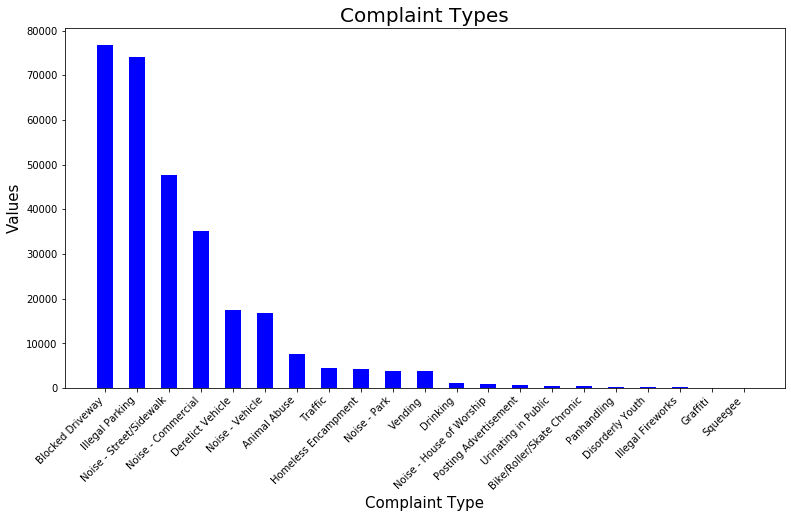

In [25]:
fig= plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel('Complaint Type', fontsize=15)
ax.set_ylabel('Values', fontsize=15)
ax.bar(complaint,size, width=0.5, color='b')
plt.title('Complaint Types', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

### Observation:
1. There are 21 different types of complaint type registered in NYPD.
2. Top 5 complaint types are more frequent and comprises of major complaints in the area.

### Visualize the top 5 complaint type using Pie Chart

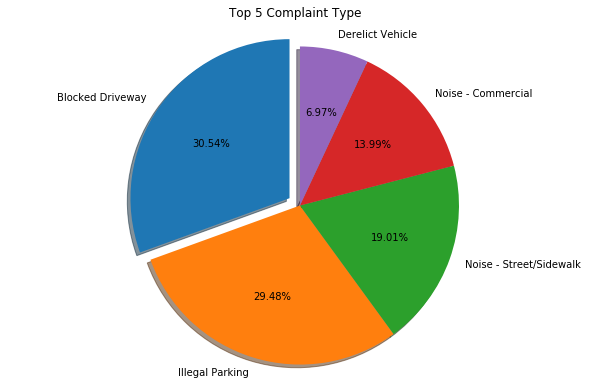

In [26]:
fig=plt.figure(figsize=(8,5))
explode = (0.08, 0, 0, 0,0)  # only "explode" the 1st slice (i.e. 'Blocked Driveway')
ax=fig.add_axes([0,0,1,1])
ax.pie(size[:5], explode=explode, labels=complaint[:5], autopct='%1.2f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 5 Complaint Type')
plt.show()

### Observation:
There are 21 different types of complaint registered in NYPD and from the above it is seen that the top 5 complaint types are
1. Blocked Driveway which consist of more than 25% of overall complaint.
2. Illegal Parking is followed by Blocked Driveway.
3. Noise - Street/Sidewalk which is 16%.
4. Noise - Commercial.
5. Derelict Vehicle.
Top 5 Complaint types comprises of almost 85% of complaints.

### Complaint status Borough wise

In [27]:
df_status=df_NYC_final.groupby(['Borough','Status']).size().unstack()

In [28]:
df_status

Status,Assigned,Closed,Draft,Open
Borough,,,,
BRONX,4.0,40582.0,NaN,3.0
BROOKLYN,12.0,98081.0,1.0,7.0
MANHATTAN,4.0,65467.0,NaN,7.0
QUEENS,6.0,80540.0,NaN,16.0
STATEN ISLAND,NaN,12325.0,NaN,3.0


In [29]:
# Replacing NaN value to 0.0 to analyze the data.
df_status.fillna(0.0, inplace=True)
df_status

Status,Assigned,Closed,Draft,Open
Borough,,,,
BRONX,4.0,40582.0,0.0,3.0
BROOKLYN,12.0,98081.0,1.0,7.0
MANHATTAN,4.0,65467.0,0.0,7.0
QUEENS,6.0,80540.0,0.0,16.0
STATEN ISLAND,0.0,12325.0,0.0,3.0


### Visualizing complaint status through different borough

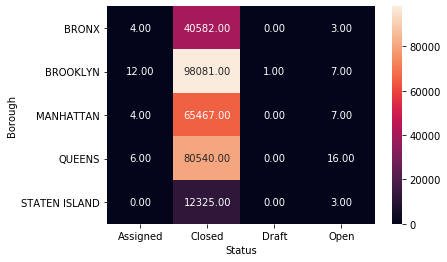

In [30]:
#create heatmap for different complaint in different borough
sns.heatmap(df_status,annot=True,fmt='0.2f')
plt.show()

Most of the cases been closed in all the borough but Brooklyn has one case in draft and few has open and assigned cases.

### Top 10 Cities with most complaints

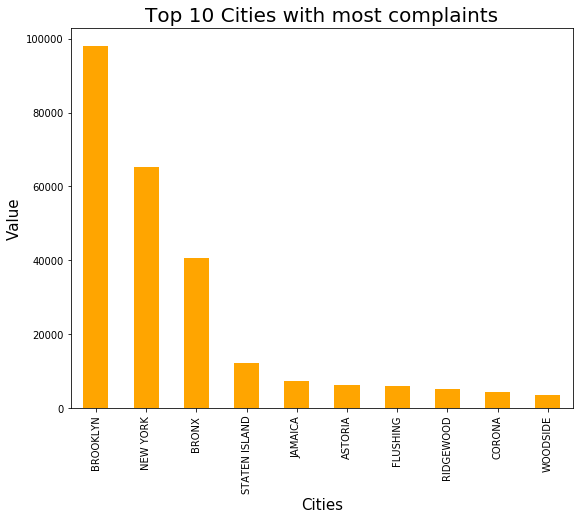

In [31]:
df_NYC_final['City'].value_counts().head(10).plot(kind='bar',figsize=(9,7), width=0.5,color='orange')
plt.xlabel('Cities', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.title('Top 10 Cities with most complaints', fontsize=20)
plt.show()

### Observation:
We can see top 10 cities with most number of complaints out of which top 5 are Brooklyn, which comes first followed by New York, Bronx, Staten Island and Jamaica.

### Visualizing count of different complaint type over Borough

In [32]:
borough_comp=df_NYC_final.groupby(['Borough','Complaint Type']).size().unstack()
borough_comp

Complaint Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Borough,,,,,,,,,,,,,,,,,,,,,
BRONX,1413.0,20.0,12744.0,1949.0,63.0,188.0,9.0,245.0,24.0,7833.0,...,79.0,522.0,8864.0,3386.0,19.0,17.0,NaN,355.0,51.0,377.0
BROOKLYN,2391.0,110.0,28136.0,5167.0,72.0,257.0,43.0,848.0,60.0,27401.0,...,338.0,1538.0,13316.0,5146.0,48.0,45.0,NaN,1082.0,136.0,515.0
MANHATTAN,1511.0,220.0,2056.0,530.0,68.0,294.0,22.0,2737.0,32.0,11983.0,...,189.0,1167.0,20364.0,5375.0,190.0,41.0,4.0,1534.0,251.0,2381.0
QUEENS,1875.0,58.0,31636.0,8104.0,59.0,357.0,37.0,464.0,37.0,21955.0,...,299.0,634.0,4397.0,2608.0,32.0,30.0,NaN,1303.0,140.0,477.0
STATEN ISLAND,557.0,6.0,2141.0,1764.0,23.0,175.0,2.0,71.0,10.0,4884.0,...,17.0,67.0,815.0,356.0,12.0,515.0,NaN,197.0,14.0,25.0


In [33]:
# Replacing Missing value with 0.0
borough_comp.fillna(0.0, inplace=True)

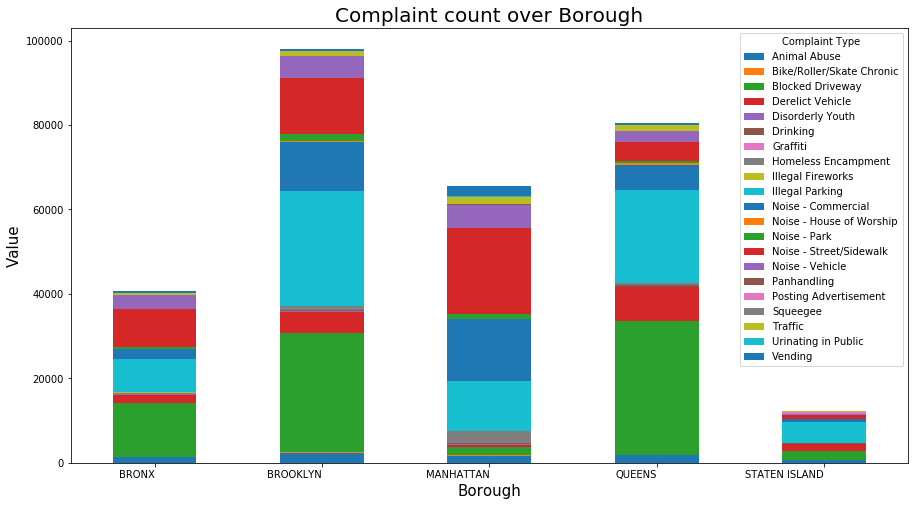

In [34]:
# ploting stacked bar plot for different complauint type over borough
borough_comp.plot(kind='bar', figsize=(15,8),stacked=True)
plt.xlabel('Borough',fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.title('Complaint count over Borough', fontsize=20)
plt.xticks(rotation=360, ha='right')
plt.show()

All the different complaint types are plotted over borough and we can understand :
1. Bronx has Blocked Driveway and illegal parking as two of the major complaints.
2. Brooklyn has Blocked Driveway and illegal parking as two of the major complaints.
3. Manhattan has Derelict Vehicle and Noise as two of the major complaints.
4. Queens has Blocked Driveway and illegal parking as two of the major complaints.
5. Staten Island has illegal parking as one of the major complaint.

Blocked Driveway, illegal Parking, Noise are some major complaints over the borough.

### Visualize Complaint count over months.

In [35]:
df_month=df_NYC_final['month'].value_counts().reset_index()

In [36]:
df_month.rename(columns={'index':'month','month':'value'}, inplace=True)
df_month

,month,value
0,May,35944
1,September,35012
2,June,34836
3,August,34582
4,July,34236
5,October,32222
6,November,30548
7,December,30324
8,April,26958
9,March,2273


In [37]:
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
df_month.index=pd.CategoricalIndex(df_month['month'], categories=sort_order, ordered=True)
df_month=df_month.sort_index().reset_index(drop=True)

In [38]:
df_month

,month,value
0,January,123
1,March,2273
2,April,26958
3,May,35944
4,June,34836
5,July,34236
6,August,34582
7,September,35012
8,October,32222
9,November,30548


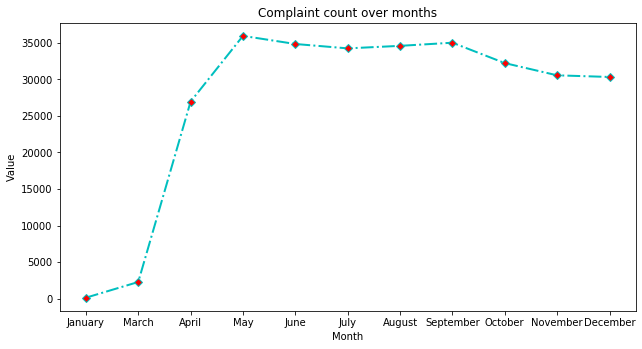

In [39]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel('Month')
ax.set_ylabel('Value')
plt.title('Complaint count over months')
ax.plot(df_month['month'],df_month['value'], color='c', linestyle='-.', marker='D',linewidth=2, markerfacecolor='red')
plt.show()

## Hypothesis Testing

- Whether the average response time across complaint types is similar or not.
- Are the type of complaint are location related.

### Whether the average response time across complaint type is similar or not

Complaint type has many different sub categories and overall average response time is a continous data, so one way anova is applied.

In [40]:
df_complaint= df_NYC_final['Complaint Type'].reset_index()
#response_time=df_NYC_final['Request_closing_time'].reset_index()

In [41]:
df_complaint.drop('Unique Key', axis=1, inplace=True)

In [42]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_complaint['Complaint Type']= label_encoder.fit_transform(df_complaint['Complaint Type'])
  
df_complaint['Complaint Type'].unique()

array([13,  2,  9,  3, 10, 11, 16, 14,  0, 20, 18,  5,  1, 15, 12,  7, 19,
        6,  4,  8, 17])

In [43]:
df_response_time= df_NYC_final['Request_closing_time'].reset_index()
df_response_time.drop('Unique Key', axis=1, inplace=True)

In [44]:
complaint=df_complaint['Complaint Type']
response_time= df_response_time['Request_closing_time']

In [45]:
# Importing library
from scipy.stats import f_oneway
  
# Conduct the one-way ANOVA
f_oneway(complaint, response_time)


F_onewayResult(statistic=150424.5665893888, pvalue=0.0)

### Observation

Complaint Type has many different sub categories and response time is continuous data for which one way anova test is applied.
The two Hypothesis which we consider :
1. Null Hypothesis(H0) were we consider there is no difference in average response time over complaint type.
2. Alternate Hypothesis(H0) were we consider there is difference in average response time over complaint type.

If the P value after test is less than alpha which is 0.05 we reject Null Hpothesis and we conclude there is a difference in response time over complaint type.
Here the P value is less than significant value which we consider to 0.05, so reject Null Hypothesis and we accept Alternate Hypothesis and we conclude there is difference in response time over complaint types.


### Are the Complaint types location related


In [46]:
d_table= pd.crosstab(df_NYC_final['Complaint Type'],df_NYC_final['City'])

In [47]:
print(d_table)

City                       ARVERNE  ASTORIA  Astoria  BAYSIDE  BELLEROSE  \
Complaint Type                                                             
Animal Abuse                    38      125        0       37          7   
Bike/Roller/Skate Chronic        0       15        0        0          1   
Blocked Driveway                35     2618      116      377         95   
Derelict Vehicle                27      351       12      198         89   
Disorderly Youth                 2        3        0        1          2   
Drinking                         1       35        0        1          1   
Graffiti                         1        4        0        3          0   
Homeless Encampment              4       32        0        2          1   
Illegal Fireworks                0        4        0        0          1   
Illegal Parking                 58     1065      213      513        106   
Noise - Commercial               2     1282      261       40         37   
Noise - Hous

In [48]:
d_tab=d_table.values

In [49]:

from scipy.stats import chi2_contingency
  
# defining the table

stat, p, dof, expected = chi2_contingency(d_tab)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

print(stat, p, dof, expected)

p value is 0.0
Dependent (reject H0)
110257.88095194982 0.0 1040 [[5.73739808e+00 1.64689404e+02 1.86726229e+01 ... 6.42327795e+01
  9.23460301e+01 3.12948986e+00]
 [3.06606791e-01 8.80100856e+00 9.97865737e-01 ... 3.43260239e+00
  4.93497566e+00 1.67240068e-01]
 [5.68133496e+01 1.63080138e+03 1.84901629e+02 ... 6.36051273e+02
  9.14436686e+02 3.09890998e+01]
 ...
 [3.31120522e+00 9.50466407e+01 1.07764679e+01 ... 3.70704475e+01
  5.32953531e+01 1.80611194e+00]
 [4.38432899e-01 1.25850171e+01 1.42689980e+00 ... 4.90845559e+00
  7.05677679e+00 2.39145217e-01]
 [2.79575032e+00 8.02507423e+01 9.09889651e+00 ... 3.12996957e+01
  4.49988723e+01 1.52495472e+00]]


### Observation

Complaint Type has many different sub categories and City location is also categorical data for which Chi squared test is applied.
The two Hypothesis which we consider :
1. Null Hypothesis(H0) were we consider complaint is not location related.
2. Alternate Hypothesis(H0) were we consider complaint is location related.
If the P value after test is less than alpha which is 0.05 we reject Null Hpothesis and we conclude complaints are location related.
Here the P value is less than significant value which we consider to 0.05, so reject Null Hypothesis and we accept Alternate Hypothesis and we conclude complaints are location related.

# Conclusion

There are 21 different types of complaint registered in NYPD.

Top 5 Complaint types comprises of almost 85% of complaints.

The top cities with most number of complaints are Brooklyn, New York, Bronx, Staten Island and Jamaica.

January records the least number of cases throughout the year.

After performing the statistical analysis we consider there is a difference in response time over complaint types and complaints are related to different cities as we considered cities as location.
